# E-commerce Customer Segmentation Project

Customer segmentation splits customers into different groups to help companies develop more strategic methods of targeting each customer segment.

Table of Contents:
- Data Cleaning/Manipulation
- Data Exploration
- PCA and K-Means
- PCA and K-Means Cluster Visualizations
- K-Means Only
- K-Means Visualizations
- Closing Remarks

# Data Cleaning/Manipulation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [4]:
#data from Kaggle
data = pd.read_csv("~/Documents/Michelle Projects/Customer Segmentation/Ecommerce Customers.csv")

In [5]:
data.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [6]:
data.Avatar.value_counts()

GreenYellow       7
CadetBlue         7
Cyan              7
Teal              7
SlateBlue         7
                 ..
PaleTurquoise     1
PaleGoldenRod     1
CornflowerBlue    1
PaleGreen         1
Yellow            1
Name: Avatar, Length: 138, dtype: int64

The emails and addresses in the dataset are not real, but in a real-world scenario, it may be necessary to remove personal information to maintain confidentiality, so I will be taking out these two features. Additionally, the Avatar color feature will also be removed because it doesn't appear to be a critical feature and there are many (138) unique colors and even the most popular ones only have 7 users.

In [38]:
datanew = data.drop(['Email','Address','Avatar'],axis=1)
datanew.head()

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [39]:
df = pd.DataFrame(datanew)

Checking to make sure that there are no Null values in the table:

In [12]:
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [13]:
print('The data table has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

The data table has 500 rows and 5 columns.


In [16]:
print("The data columns are:")
print(list(df.columns))

The data columns are:
['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']


# Data Exploration

Session Length

Session Length Stats
count    500.00
mean      33.05
std        0.99
min       29.53
25%       32.34
50%       33.08
75%       33.71
max       36.14
Name: Avg. Session Length, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205DF9F8388>]],
      dtype=object)

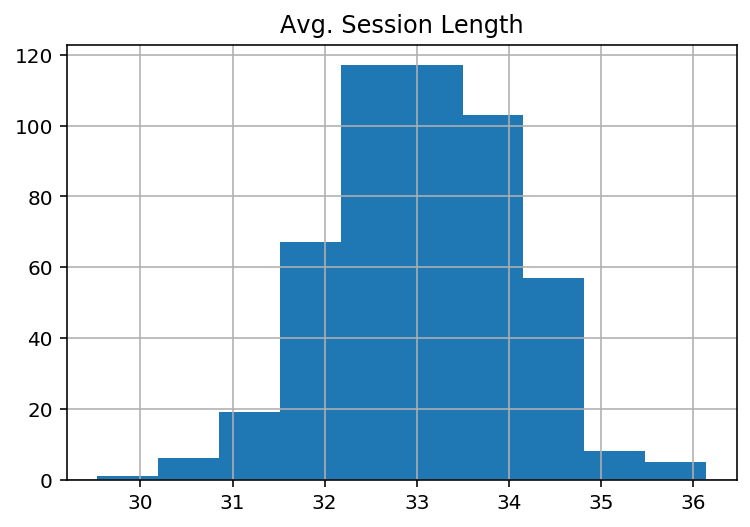

In [194]:
print('Session Length Stats')
print(round(datanew['Avg. Session Length'].describe(),2))
datanew.hist(column='Avg. Session Length')

Time on App

Time on App Stats
count    500.00
mean      12.05
std        0.99
min        8.51
25%       11.39
50%       11.98
75%       12.75
max       15.13
Name: Time on App, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205DFAB4948>]],
      dtype=object)

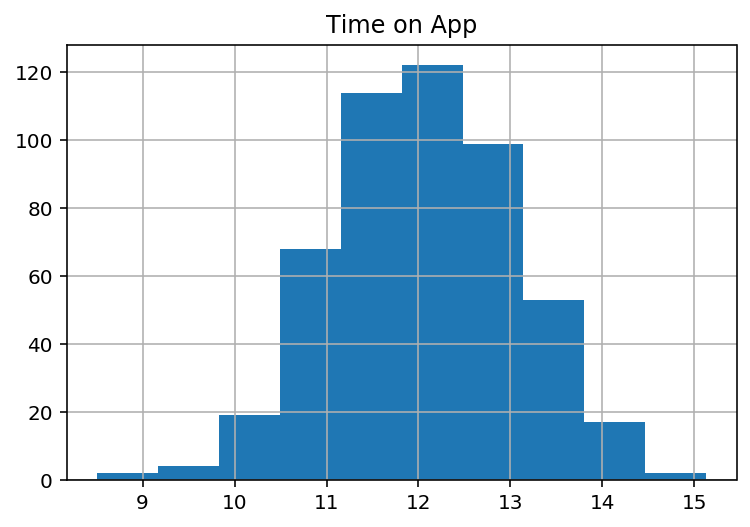

In [195]:
print('Time on App Stats')
print(round(datanew['Time on App'].describe(),2))
datanew.hist(column='Time on App')

Time on Website

Time on Website Stats
count    500.00
mean      37.06
std        1.01
min       33.91
25%       36.35
50%       37.07
75%       37.72
max       40.01
Name: Time on Website, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205DFB34B88>]],
      dtype=object)

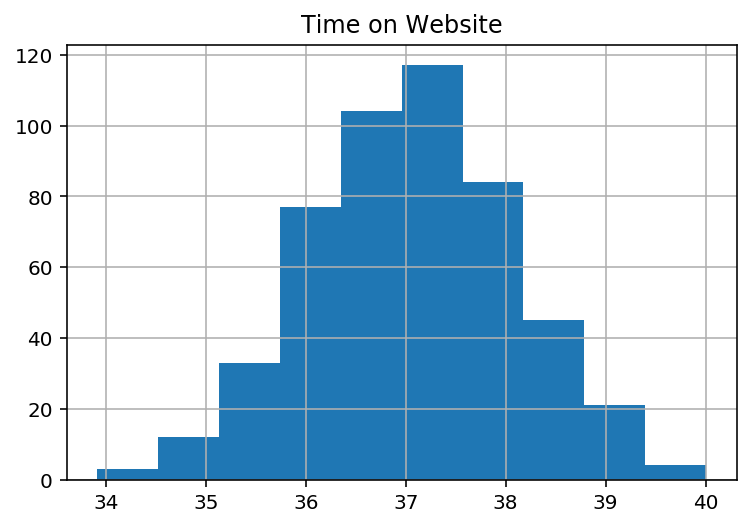

In [196]:
print('Time on Website Stats')
print(round(datanew['Time on Website'].describe(),2))
datanew.hist(column='Time on Website')

Length of Membership

Length of Membership Stats
count    500.00
mean       3.53
std        1.00
min        0.27
25%        2.93
50%        3.53
75%        4.13
max        6.92
Name: Length of Membership, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205E09F8F08>]],
      dtype=object)

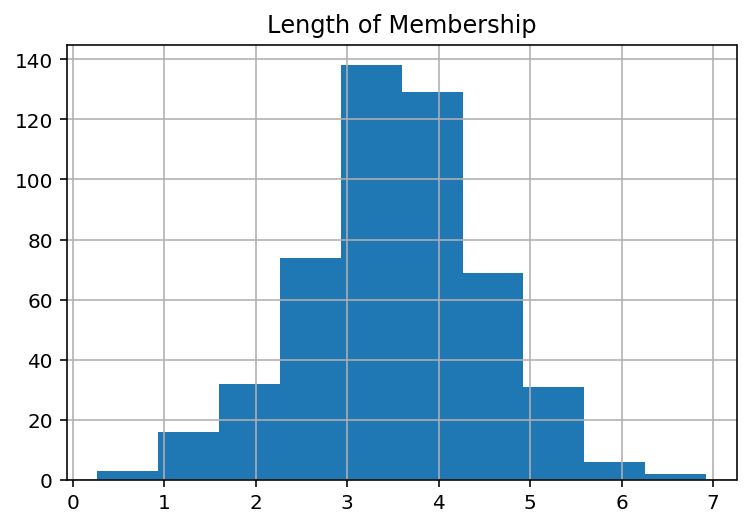

In [197]:
print('Length of Membership Stats')
print(round(datanew['Length of Membership'].describe(),2))
datanew.hist(column='Length of Membership')

Yearly Amount Spent

Yearly Amount Spent Stats
count    500.00
mean     499.31
std       79.31
min      256.67
25%      445.04
50%      498.89
75%      549.31
max      765.52
Name: Yearly Amount Spent, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205E0A9C808>]],
      dtype=object)

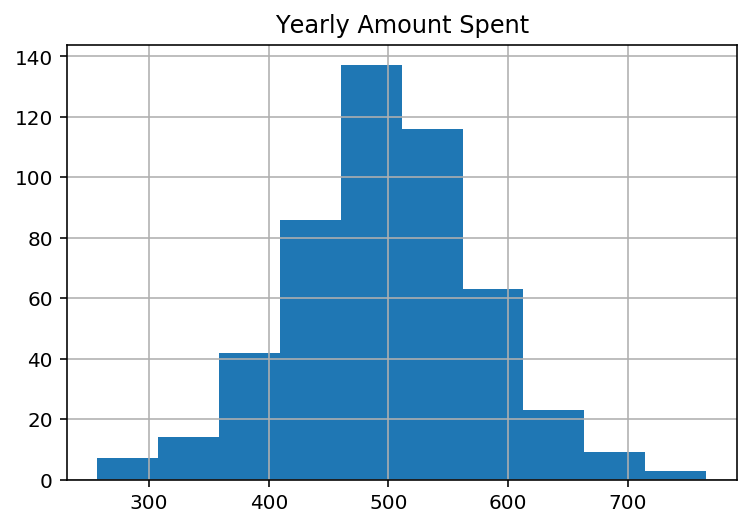

In [198]:
print('Yearly Amount Spent Stats')
print(round(datanew['Yearly Amount Spent'].describe(),2))
datanew.hist(column='Yearly Amount Spent')

At a glance, the distributions of each of these features aproximately follows that of a Normal Distribution (for some, possibly a Cauchy or t Distribution).

We know the average, minimum, and maximum values for each of these customer features and can see that the majority of customers' shopping/browsing times and spending amounts are not at either extreme.

# PCA and K-Means

I will first be using Principal Component Analysis (PCA) and K-Means clustering in conjunction to identify segments of customers.

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Scaling the data (standardization):

In [45]:
data2 = df

In [46]:
scaler = StandardScaler()
features = ['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
for i in features:
    data2[i] = scaler.fit_transform(df[i].values.reshape(-1,1))

In [47]:
data2

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0               1.456351     0.607280         2.493589              0.550107   
1              -1.136502    -0.949464         0.206556             -0.870927   
2              -0.052723    -0.727139         0.049681              0.572067   
3               1.263010     1.676390        -0.335978             -0.413996   
4               0.279838     0.747770         0.471737              0.914422   
..                   ...          ...              ...                   ...   
495             0.186035     1.524003        -0.636429              0.213479   
496             1.663357    -0.359187         0.128603              0.043139   
497            -0.409872    -0.556854         1.260187              1.427261   
498             0.271597     0.341248        -0.218291             -1.199042   
499             0.668422     0.368821        -1.277323             -0.799679   

     Yearly Amount Spent  
0               1.118654  
1              -1.351783  
2              -0.148501  
3               1.041684  
4               1.263224  
..                   ...  
495             0.940658  
496             0.375274  
497             0.660135  
498            -0.540724  
499            -0.019378  

[500 rows x 5 columns]

In [49]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

PCA:

Deciding how many features to use/keep using explained variance:

([<matplotlib.axis.XTick at 0x1ee1c4a08c8>,
 <a list of 5 Text xticklabel objects>)

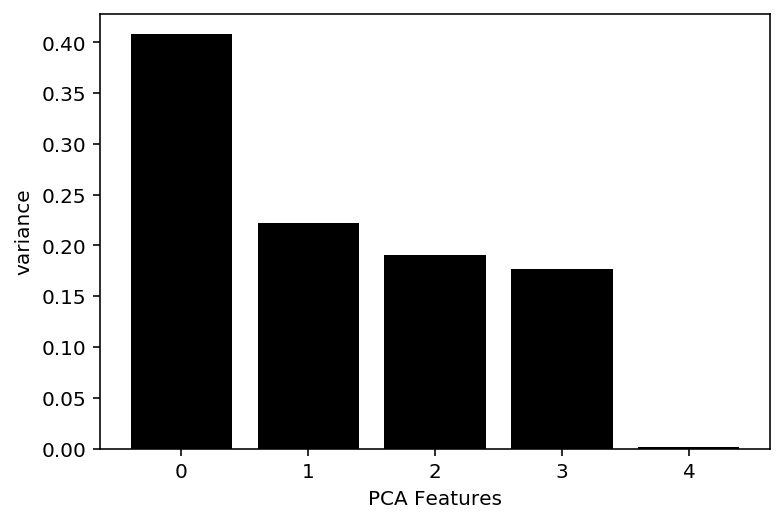

In [52]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA Features')
plt.ylabel('variance')
plt.xticks(features)

I am choosing to keep 3 components (PCA Features 0, 1, and 2) to preserve ~80% of explained variance.

In [54]:
pca = PCA(n_components = 3)
pca.fit(data2)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
pcascores = pca.transform(data2)

In [59]:
pcascores = pd.DataFrame(pcascores)

K-Means:

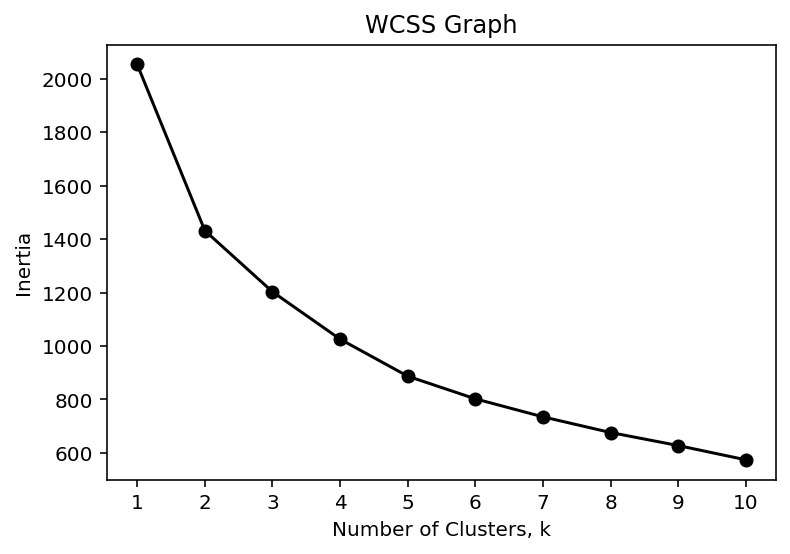

In [65]:
clusters = range(1, 11) # num of clusers to test
inertias = []
for k in clusters:
    kmeansmodel = KMeans(n_clusters=k)
    kmeansmodel.fit(pcascores.iloc[:,:3])
    inertias.append(kmeansmodel.inertia_)
    
plt.plot(clusters, inertias, '-o', color='black')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.title('WCSS Graph')
plt.xticks(clusters)
plt.show()

To determine the number of clusters to preserve, I will be using the Elbow method, which is done by locating the kink in the Within Cluster Sum of Squares (WCSS) graph. This is the point before which the inertia decreases sharply and after which the curve becomes smooth. For the WCSS graph above, the elbow appears to be at k = 2, so I will be keeping 2 clusters.

In [64]:
kmmodel = KMeans(n_clusters=2)
kmmodel.fit(pcascores.iloc[:,:3])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Joining the Components and Segments (determined using K-Means) to the e-commerce customer dataframe:

In [67]:
data_kmeans_pca = pd.concat([data2,pd.DataFrame(pcascores)],axis=1, join='inner')
data_kmeans_pca.columns.values[-3: ]=['Component1','Component2','Component3']
data_kmeans_pca['Segment K-Means PCA'] = kmmodel.labels_
data_kmeans_pca['Segment'] = data_kmeans_pca['Segment K-Means PCA'].map({0:'First',1:'Second'})
data_kmeans_pca

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0               1.456351     0.607280         2.493589              0.550107   
1              -1.136502    -0.949464         0.206556             -0.870927   
2              -0.052723    -0.727139         0.049681              0.572067   
3               1.263010     1.676390        -0.335978             -0.413996   
4               0.279838     0.747770         0.471737              0.914422   
..                   ...          ...              ...                   ...   
495             0.186035     1.524003        -0.636429              0.213479   
496             1.663357    -0.359187         0.128603              0.043139   
497            -0.409872    -0.556854         1.260187              1.427261   
498             0.271597     0.341248        -0.218291             -1.199042   
499             0.668422     0.368821        -1.277323             -0.799679   

     Yearly Amount Spent  Component1  Component2  Component3  \
0               1.118654    1.663154   -1.332601   -2.189420   
1              -1.351783   -2.067810   -0.155499    0.454685   
2              -0.148501   -0.042452    0.505820    0.113190   
3               1.041684    1.403983   -0.400009   -0.802044   
4               1.263224    1.729680   -0.497465   -0.106720   
..                   ...         ...         ...         ...   
495             0.940658    1.357957   -0.415883    0.388006   
496             0.375274    0.599344    0.801971   -1.429502   
497             0.660135    0.962783   -0.380057    0.075552   
498            -0.540724   -0.869742   -0.182529   -0.435551   
499            -0.019378   -0.154251    0.720816   -0.103569   

     Segment K-Means PCA Segment  
0                      0   First  
1                      1  Second  
2                      1  Second  
3                      0   First  
4                      0   First  
..                   ...     ...  
495                    0   First  
496                    0   First  
497                    0   First  
498                    1  Second  
499                    1  Second  

[500 rows x 10 columns]

# PCA and K-Means Cluster Visualizations

Customer segment scatter plot showing just the first two components:

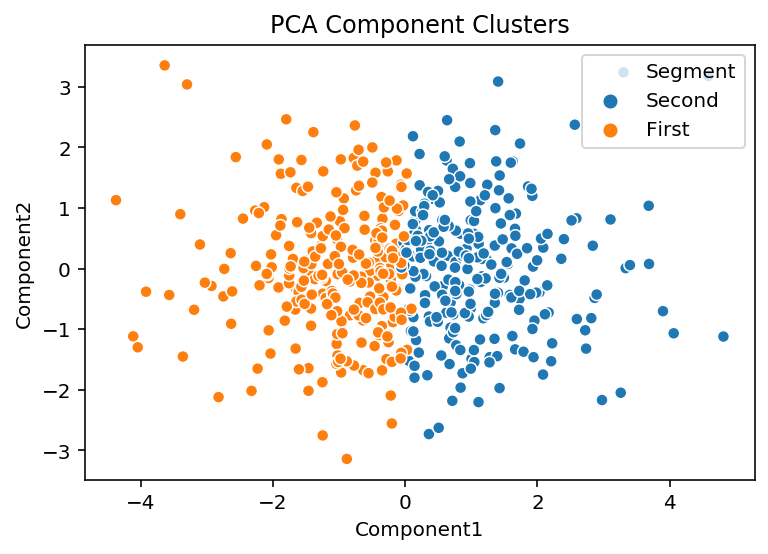

In [160]:
x_axis = data_kmeans_pca['Component1']
y_axis = data_kmeans_pca['Component2']
plt.figure()
sns.scatterplot(x_axis,y_axis,hue = data_kmeans_pca['Segment'])
plt.title('PCA Component Clusters')
plt.show()

In [207]:
!pip install plotly_express

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=31b186cb0ae38b4e39f2999887ef0e8c004f62bff76e31590fbcab1ae689e4b2
  Stored in directory: c:\users\cryst\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


Interactive 3D scatter plot showing the customer segments:
(Click and drag to move the plot)

In [208]:
import plotly_express as px

x = data_kmeans_pca['Component1'] 
y = data_kmeans_pca['Component2']
z = data_kmeans_pca['Component3']

px.scatter_3d(data_kmeans_pca, x="Component1", y="Component2", z="Component3",color="Segment")



As we can see above, there are 2 clearly defined customer segments with very minimal overlap.

# K-Means Only

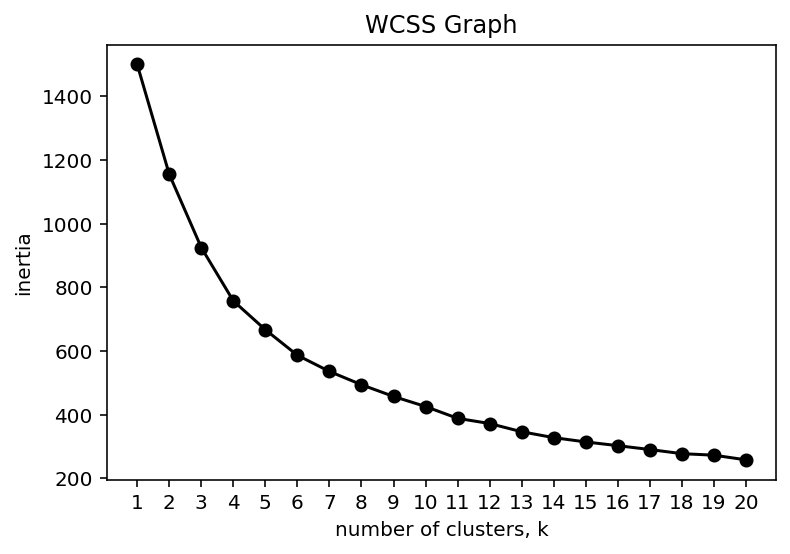

In [69]:
clusters = range(1, 21)
inertias = []
for k in clusters:
    # Create a KMeans instance with k clusters: model
    kmeansmodel2 = KMeans(n_clusters=k)
    
    # Fit model to samples
    kmeansmodel2.fit(datanew.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(kmeansmodel2.inertia_)
    
plt.plot(clusters, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('WCSS Graph')
plt.xticks(clusters)
plt.show()

Using the same elbow method as the above section, we can see that we should keep 4 clusters.

In [70]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [71]:
y_kmeans = kmeans.fit_predict(df)

Adding Segment to customer features dataframe:

In [74]:
df2=pd.concat([pd.DataFrame(datanew),pd.DataFrame(y_kmeans)],axis=1,join='inner')
df2.columns.values[-1: ]=['Segment']

In [73]:
df2

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0               1.456351     0.607280         2.493589              0.550107   
1              -1.136502    -0.949464         0.206556             -0.870927   
2              -0.052723    -0.727139         0.049681              0.572067   
3               1.263010     1.676390        -0.335978             -0.413996   
4               0.279838     0.747770         0.471737              0.914422   
..                   ...          ...              ...                   ...   
495             0.186035     1.524003        -0.636429              0.213479   
496             1.663357    -0.359187         0.128603              0.043139   
497            -0.409872    -0.556854         1.260187              1.427261   
498             0.271597     0.341248        -0.218291             -1.199042   
499             0.668422     0.368821        -1.277323             -0.799679   

     Yearly Amount Spent  Segment  
0               1.118654        3  
1              -1.351783        1  
2              -0.148501        2  
3               1.041684        3  
4               1.263224        3  
..                   ...      ...  
495             0.940658        3  
496             0.375274        2  
497             0.660135        0  
498            -0.540724        1  
499            -0.019378        2  

[500 rows x 6 columns]

# K-Means Cluster Visualization

Scatter plots showing segments and their relationship to each pair of features:

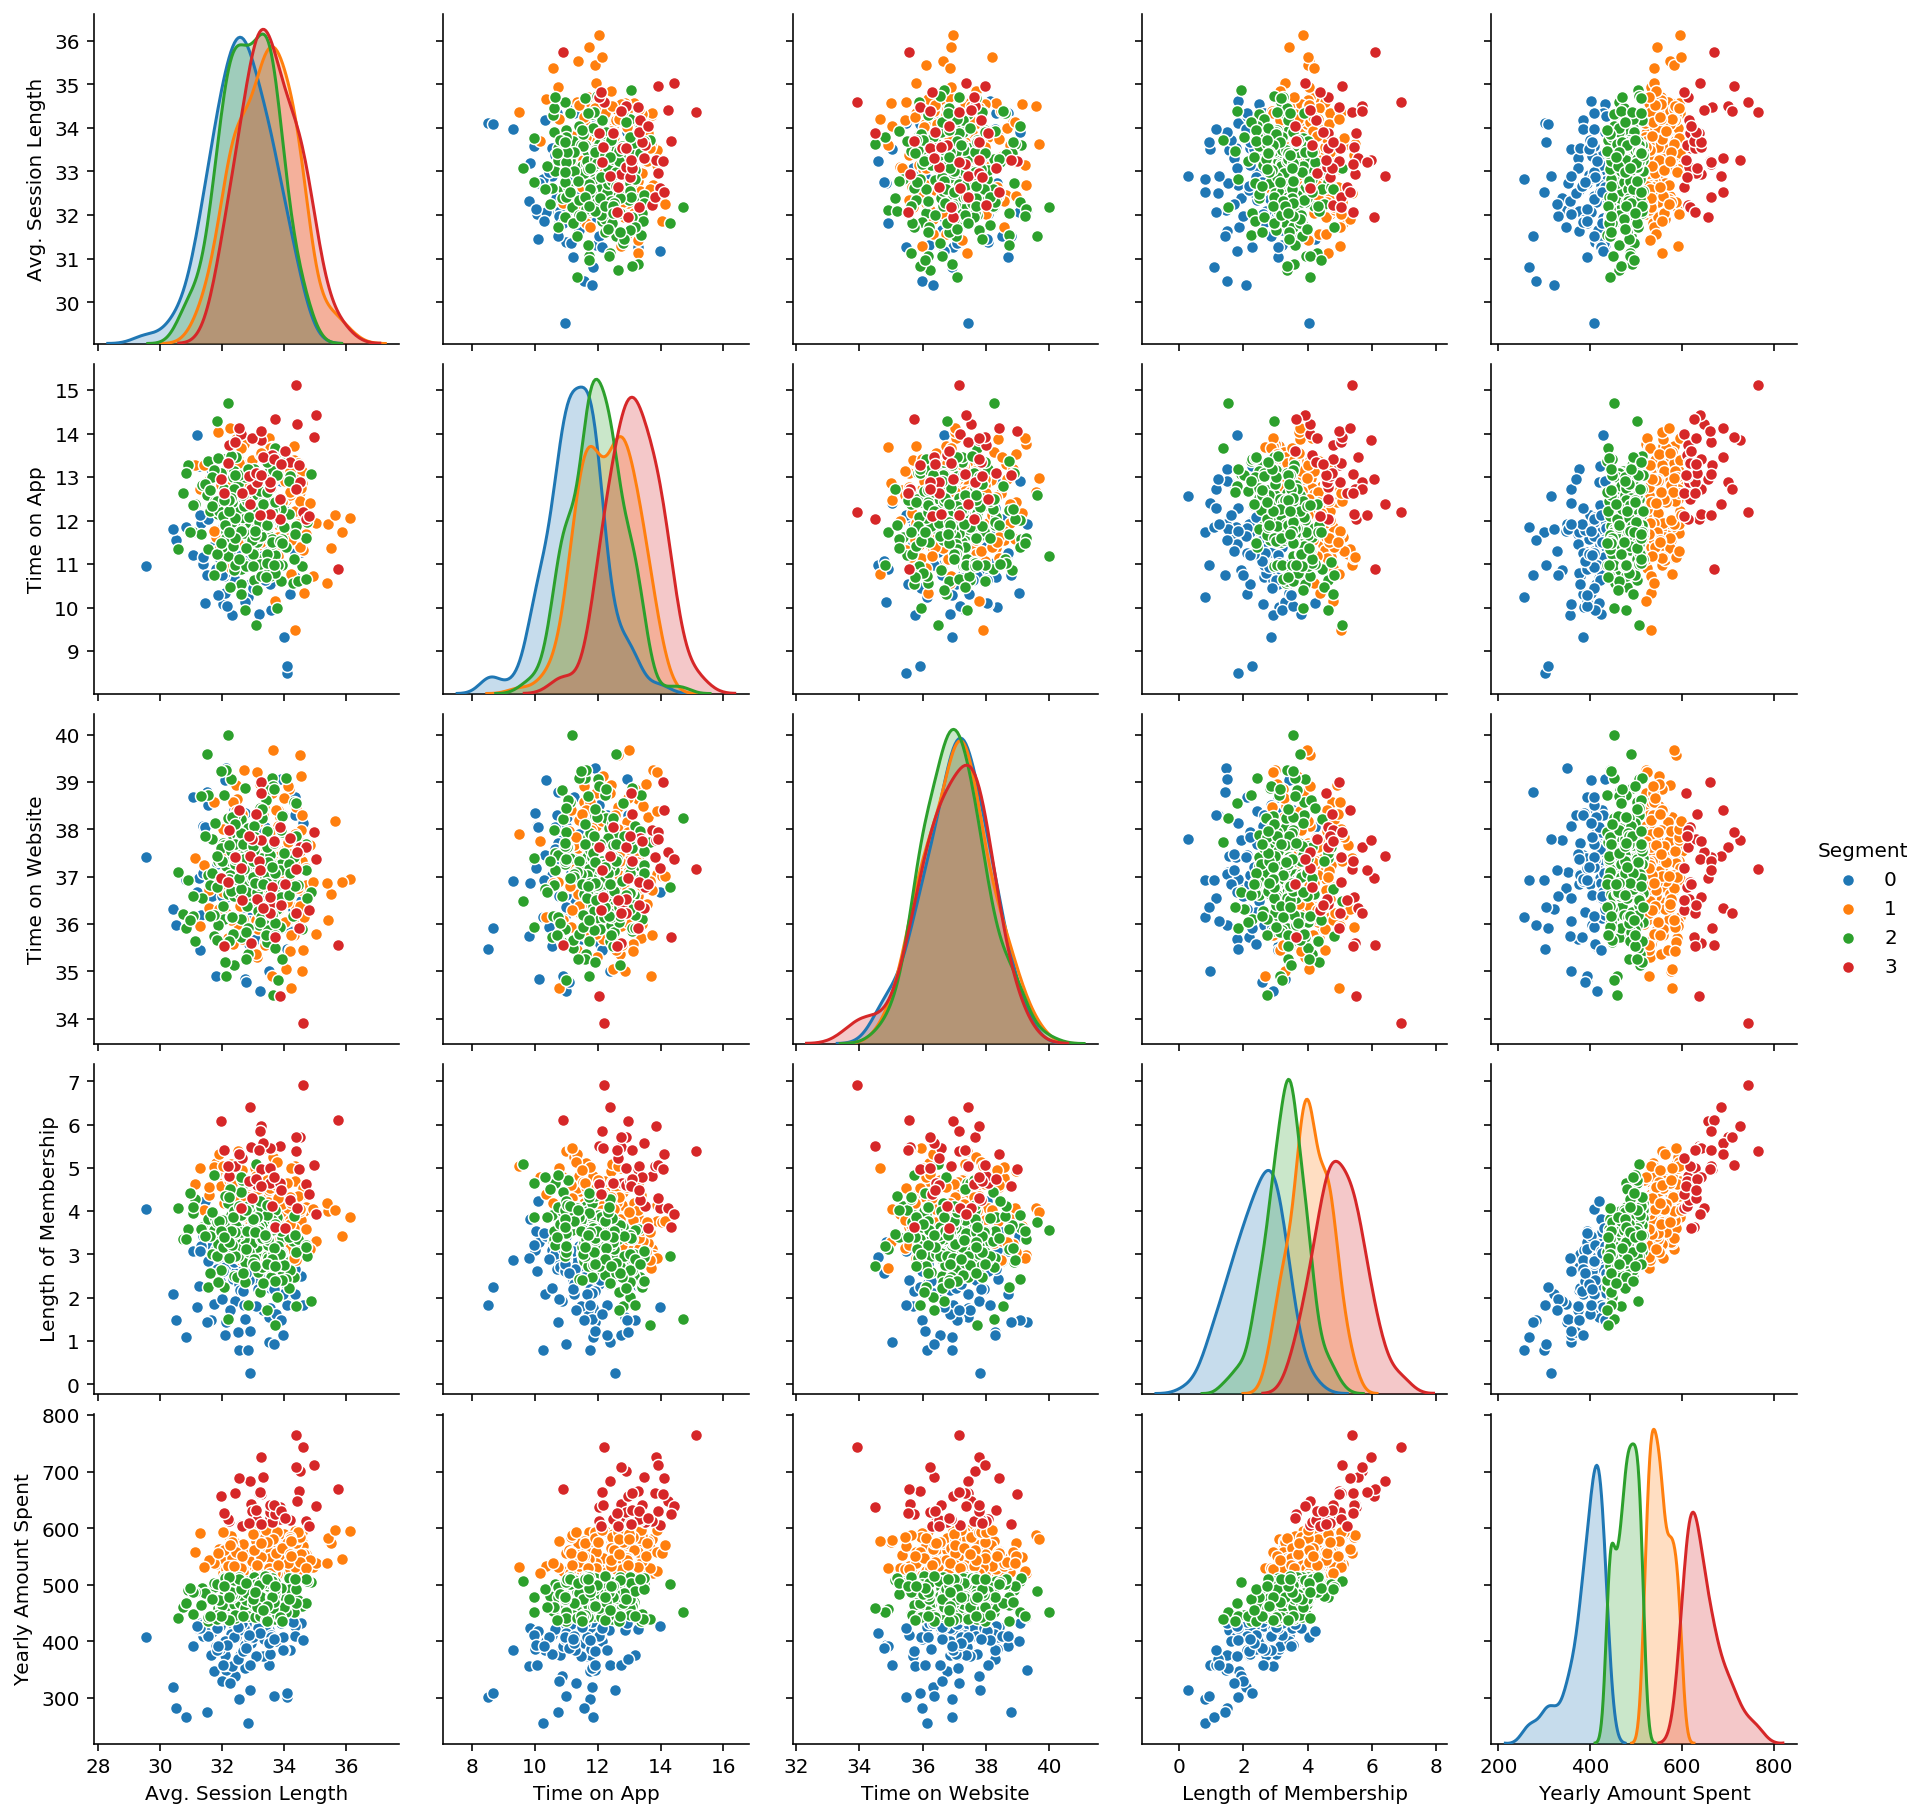

In [192]:
sns.pairplot(df2,hue = 'Segment')

Yearly Amount Spent is clearly a very strong variable in segmenting customers, and we can see that there is very little overlap in customer clusters according to Yearly Amount Spent. The Length of Membership vs Yearly Amount Spent, Avg. Session Length vs Yearly Amount Spent, and Time on App vs Yearly Amount Spent plots show especially clearly defined clusters that tell us the following about the customer segments:
- Segment 0: Low Yearly Amount Spent, Low Avg. Session Length, Low Time on App, Low Length of Membership
- Segment 1: Lower Yearly Amount Spent, Lower Avg. Session Length, Lower Time on App, Lower Length of Membership
- Segment 2: Higher Yearly Amount Spent, Higher Avg. Session Length, Higher Time on App, Higher Length of Membership
- Segment 3: High Yearly Amount Spent, High Avg. Session Length, High Time on App, High Length of Membership

# Closing Remarks

- When PCA is not performed prior to K-Means clustering, the clusters tend to overlap more closely. By performing PCA, we can visually separate the segments/dataset and reduce the dimensionality of our data by combining variables to form more insightful features. 

- The E-Commerce Customer dataset doesn't have a large number of features, so we don't face too many problems with dimensionality by using only K-Means.

- While I created 4 customer segments when using K-Means only, I only clustered out 2 segments when using PCA in conjunction with K-Means. 

- The visualizations for K-Means (without standardized data or PCA) are more interpretable at a glance since they preserve the original variable values and units.